In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 

In [2]:
df=pd.read_csv('co2_mm_mlo.csv')
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99


In [3]:
df=df[df['year']<=2010][df['month']<6]
df.tail()

C:\Users\USER\AppData\Local\Temp\ipykernel_3452\4044467104.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[df['year']<=2010][df['month']<6]


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
622,2010,1,2010.0417,388.91,388.62,30,0.92,0.32
623,2010,2,2010.1250,390.41,389.47,20,1.31,0.56
624,2010,3,2010.2083,391.37,389.85,25,1.05,0.40
625,2010,4,2010.2917,392.67,390.12,26,0.65,0.24
626,2010,5,2010.3750,393.21,390.09,29,0.65,0.23


In [4]:
#Linear Model (Decimal date, Average)
from sklearn.linear_model import LinearRegression
X=df['decimal date'].values.reshape(-1,1)
Y=df['average'].values
linear_Model=LinearRegression()
linear_Model.fit(X,Y)
linear_Pred=linear_Model.predict(X)
linear_Pred


array([310.01369581, 310.13758235, 310.25738793, 311.2356544 ,
       311.3593952 , 311.47118459, 311.59507114, 311.71487672,
       312.69299744, 312.81644674, 312.93187985, 313.05532915,
       313.17484323, 314.15063197, 314.27437277, 314.38616216,
       314.51004871, 314.62985428, 315.60812076, 315.73186155,
       315.84365094, 315.96753749, 316.08734307, 317.06560954,
       317.18935034, 317.30113973, 317.42502627, 317.54483185,
       318.52295257, 318.64640187, 318.76183499, 318.88528429,
       319.00479837, 319.98058711, 320.10432791, 320.21611729,
       320.34000384, 320.45980942, 321.43807589, 321.56181669,
       321.67360608, 321.79749263, 321.9172982 , 322.89556468,
       323.01930547, 323.13109486, 323.25498141, 323.37478699,
       324.35290771, 324.47635701, 324.59179012, 324.71523942,
       324.8347535 , 325.81054224, 325.93428304, 326.04607243,
       326.16995898, 326.28976456, 327.26803103, 327.39177182,
       327.50356121, 327.62744776, 327.74725334, 328.72

In [5]:
#Quadratic Regrassion
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2) 
X_poly=poly.fit_transform(X)
quadratic_model=LinearRegression()
quadratic_model.fit(X_poly,Y)
quadratic_model_pred=quadratic_model.predict(X_poly)
quadratic_model_pred


array([315.48483229, 315.55534313, 315.62369624, 316.18790024,
       316.26003689, 316.32535506, 316.39790655, 316.46823308,
       317.04846369, 317.12246343, 317.19181382, 317.26614685,
       317.33827443, 317.93320921, 318.00942234, 318.07842327,
       318.15505604, 318.22932941, 318.84187503, 318.9201264 ,
       318.99096871, 319.06964212, 319.14588892, 319.7745484 ,
       319.85483802, 319.9275217 , 320.00823576, 320.08645597,
       320.73113246, 320.81326597, 320.89022195, 320.97268874,
       321.0526908 , 321.71191781, 321.79628391, 321.87265036,
       321.95744569, 322.03961275, 322.71661385, 322.80301819,
       322.88122602, 322.968062  , 323.05220247, 323.74531745,
       323.83376003, 323.91380923, 324.00268585, 324.08879975,
       324.79792212, 324.88818939, 324.97275097, 325.06335151,
       325.15122805, 325.8747473 , 325.96726636, 326.05099833,
       326.14395623, 326.23401697, 326.97547356, 327.07003086,
       327.15560421, 327.25060275, 327.34263692, 328.10

In [6]:
X_Harmonic=np.column_stack([X_poly,np.sin(2*np.pi * X[:,0]/12),np.cos(2*np.pi * X[:,0]/12)])
Harmonic_Model=LinearRegression()
Harmonic_Model.fit(X_Harmonic,Y)
Harmonic_pred=Harmonic_Model.predict(X_Harmonic)
Harmonic_pred

array([315.45606815, 315.52956752, 315.60081126, 316.18800764,
       316.2628964 , 316.33065611, 316.40585913, 316.47869121,
       317.07670215, 317.15254762, 317.22353245, 317.29951273,
       317.37313326, 317.9762461 , 318.05296099, 318.12230865,
       318.19920713, 318.27361878, 318.88298276, 318.96030121,
       319.03020328, 319.10772887, 319.1827622 , 319.79807152,
       319.87628939, 319.94703908, 320.02554493, 320.10156904,
       320.7266599 , 320.80618802, 320.88069663, 320.96053931,
       321.03799929, 321.67703765, 321.75899399, 321.83322711,
       321.91571128, 321.99570073, 322.65755287, 322.74243488,
       322.8193536 , 322.90485943, 322.98781465, 323.67523783,
       323.76349131, 323.84347516, 323.93239668, 324.0186715 ,
       324.73337288, 324.8248677 , 324.91067801, 325.00271965,
       325.09209298, 325.83121169, 325.92608545, 326.01200594,
       326.10745293, 326.1999802 , 326.96318938, 327.06062636,
       327.14881086, 327.2467087 , 327.34154721, 328.12

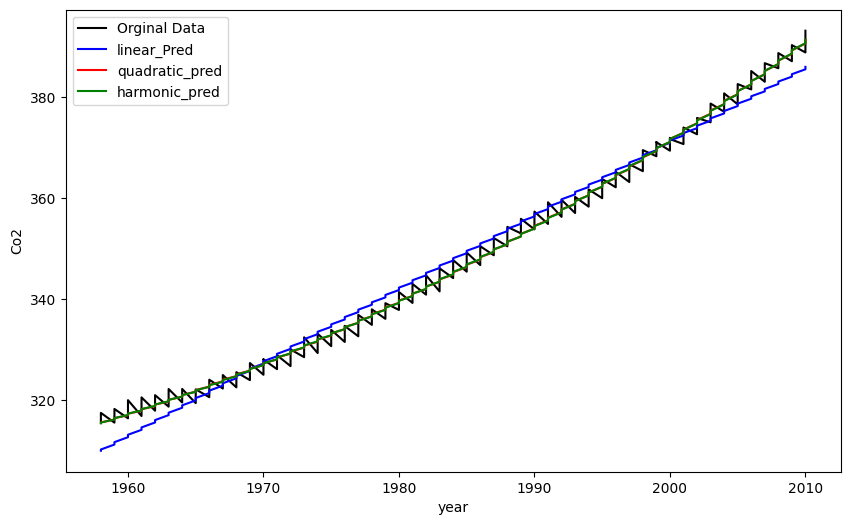

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df['year'],Y,label='Orginal Data',color='black')
plt.plot(df['year'],linear_Pred,label='linear_Pred',color='blue')
plt.plot(df['year'],quadratic_model_pred,label='quadratic_pred',color='red')
plt.plot(df['year'],Harmonic_pred,label='harmonic_pred',color='green')
plt.xlabel('year')
plt.ylabel('Co2')
plt.legend()
plt.show()

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df['linear_Pred'] = linear_Pred
df['quadratic_model_pred'] =quadratic_model_pred
df['Harmonic_pred'] =Harmonic_pred
model = ols('deseasonalized ~ linear_Pred + quadratic_model_pred +Harmonic_pred', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq     df         F    PR(>F)
linear_Pred             0.015442    1.0  0.027981  0.867284
quadratic_model_pred    0.046560    1.0  0.084365  0.771699
Harmonic_pred           0.841896    1.0  1.525498  0.217909
Residual              142.937720  259.0       NaN       NaN
